# Project no. 1 Visualization recap - R + Python

**Author: Filip Kołodziejczyk 313019**

Since exercises for Python and R are equivalent, this notebook will present both solutions for each subtask in parallel.

The dataset used in this file consist of characteristics of red and white variants of the Portuguese “Vinho Verde” wine.

## Prerequisites (environment setup + data loading)

In [96]:
## Enable R magic to use R in Jupyter
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [97]:
%%R
library(ggplot2)
library(ggExtra)
library(dplyr)
library(tidyr)
library(readr)
library(knitr)
library(scales)

# Data params
dataset_url <- "http://archive.ics.uci.edu/static/public/186/wine+quality.zip"
white_wine_filename <- "winequality-white.csv"
red_wine_filename <- "winequality-red.csv"

# Download the dataset
tmp_file <- tempfile()
download.file(dataset_url, tmp_file, quiet = TRUE)

# Unzip to temp directory
tmp_dir <- tempdir()
unzip(tmp_file, exdir = tmp_dir)

# # Load the data 
white_wine <- read_delim(file.path(tmp_dir, white_wine_filename), delim = ";", show_col_types = FALSE) %>% 
    mutate(wine_type = "white")
red_wine <- read_delim(file.path(tmp_dir, red_wine_filename), delim = ";", show_col_types = FALSE) %>% 
    mutate(wine_type = "red")

# Combine the datasets
wine_quality <- bind_rows(white_wine, red_wine)
    
# Confirm the dataset has been loaded.
head(wine_quality) %>% knitr::kable()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.




| fixed acidity| volatile acidity| citric acid| residual sugar| chlorides| free sulfur dioxide| total sulfur dioxide| density|   pH| sulphates| alcohol| quality|wine_type |
|-------------:|----------------:|-----------:|--------------:|---------:|-------------------:|--------------------:|-------:|----:|---------:|-------:|-------:|:---------|
|           7.0|             0.27|        0.36|           20.7|     0.045|                  45|                  170|  1.0010| 3.00|      0.45|     8.8|       6|white     |
|           6.3|             0.30|        0.34|            1.6|     0.049|                  14|                  132|  0.9940| 3.30|      0.49|     9.5|       6|white     |
|           8.1|             0.28|        0.40|            6.9|     0.050|                  30|                   97|  0.9951| 3.26|      0.44|    10.1|       6|white     |
|           7.2|             0.23|        0.32|            8.5|     0.058|                  47|                  186|  0.9956| 3.19| 

In [98]:
import requests
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tempfile import NamedTemporaryFile, TemporaryDirectory

# Data params
dataset_ulr = "http://archive.ics.uci.edu/static/public/186/wine+quality.zip"
white_wine_filename = "winequality-white.csv"
red_wine_filename = "winequality-red.csv"

# Download the dataset
response = requests.get(dataset_ulr)

# Loading the dataset into memory
with NamedTemporaryFile(delete=False) as tmp_file:
    tmp_file.write(response.content)
    tmp_dir = TemporaryDirectory()
    with zipfile.ZipFile(tmp_file.name) as archive:
        archive.extractall(tmp_dir.name)

    # Combine the datasets
    wine_quality = pd.concat(
        [
            pd.read_csv(f"{tmp_dir.name}/{white_wine_filename}", delimiter=";").assign(
                wine_type="white"
            ),
            pd.read_csv(f"{tmp_dir.name}/{red_wine_filename}", delimiter=";").assign(
                wine_type="red"
            ),
        ]
    )

# Set the color palette
palette = {"red": "red", "white": "grey"}

# Confirm the dataset has been loaded
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


## 1.1 `alcohol` variable distribution

For distribution for one numerical, continuous variable without grouping, histogram is a good choice. To handle issue with potential, not optimal choice of bins, KDE curve is added to the plot. Example of how the binning affect histogram is shown below, where bin width differs.

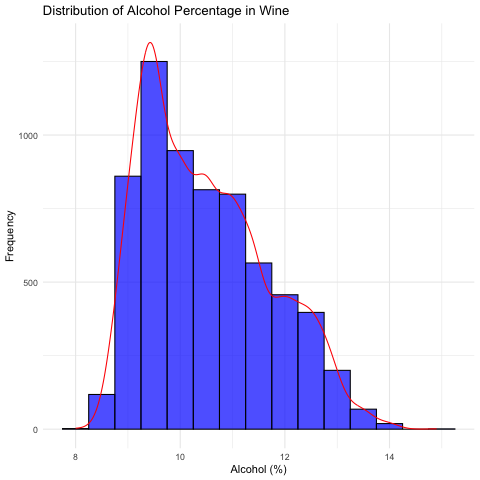

In [99]:
%%R
total_count <- nrow(wine_quality)
bin_width <- 0.5

ggplot(wine_quality, aes(x = alcohol)) +
  geom_histogram(aes(y = ..count..), binwidth = bin_width, fill="blue", color="black", alpha=0.7) +
  geom_density(aes(y = ..density.. * total_count * bin_width), colour="red", alpha=0.3) +
  labs(title = "Distribution of Alcohol Percentage in Wine",
       x = "Alcohol (%)",
       y = "Frequency") +
  theme_minimal()

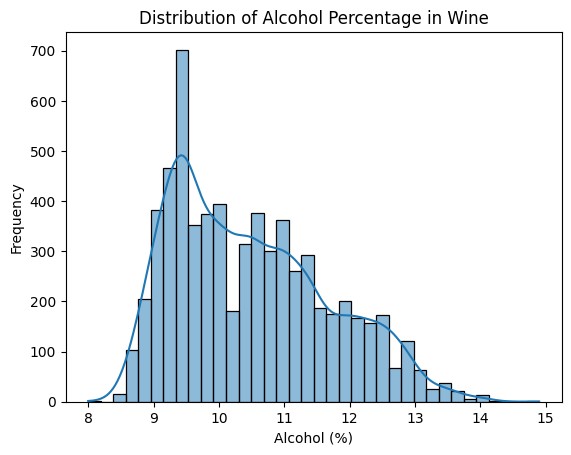

In [100]:
sns.histplot(wine_quality["alcohol"], kde=True)
plt.title("Distribution of Alcohol Percentage in Wine")
plt.xlabel("Alcohol (%)")
plt.ylabel("Frequency")
plt.show()

## 1.2 `alcohol` variable distribution by wine type

When comparing distributions of one numerical variable for two groups, violin plot is a good choice. It allows to compare the distributions of the variable for two groups. Compared to box plot, it also shows the density of the variable for each group. Another option is to use two histograms, but it is harder to compare them.

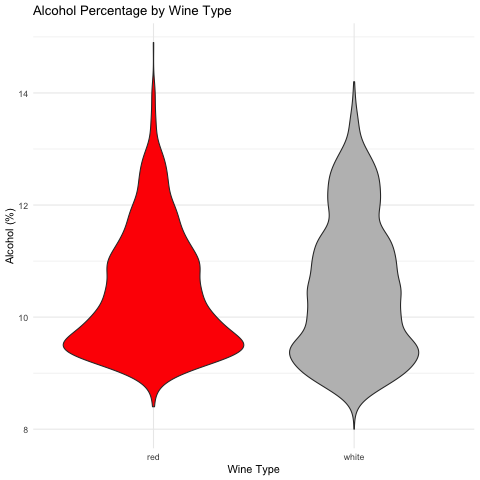

In [101]:
%%R
ggplot(wine_quality, aes(x = wine_type, y = alcohol, fill = wine_type)) +
  geom_violin() +
  labs(title = "Alcohol Percentage by Wine Type",
       x = "Wine Type",
       y = "Alcohol (%)") +
  theme_minimal() +
  scale_fill_manual(values = c("red" = "red", "white" = "grey")) +
  theme(legend.position = "none")

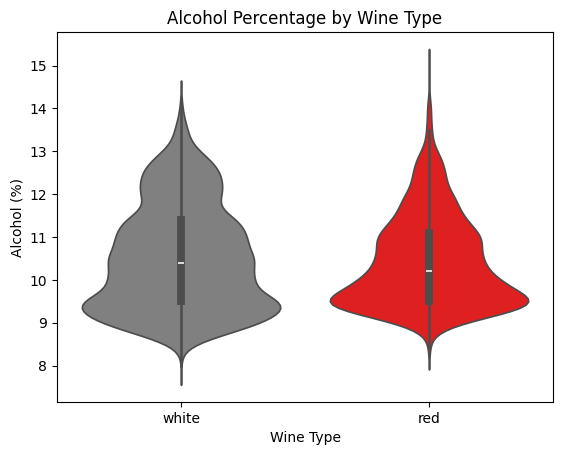

In [102]:
sns.violinplot(data=wine_quality, x="wine_type", y="alcohol", hue="wine_type", palette=palette)
plt.title("Alcohol Percentage by Wine Type")
plt.xlabel("Wine Type")
plt.ylabel("Alcohol (%)")
plt.show()

## 1.3 `alcohol` variable distribution by quality group

Similar to previous case, violin plot is a good choice. However, to make the report more diverse, box plot is used.

***Note:*** I think in the task description, there is a mistake. `response` variable is not present in the dataset. I assume that the correct variable is `quality`.

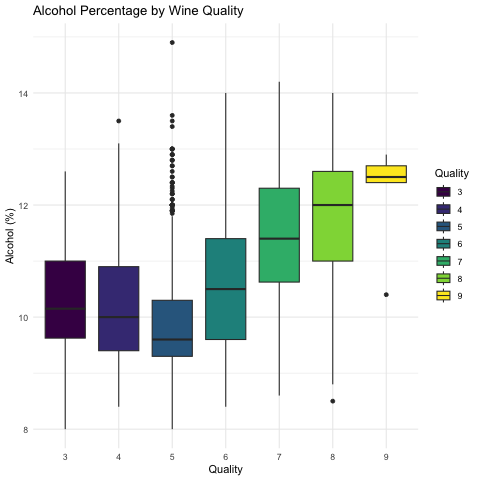

In [103]:
%%R
ggplot(wine_quality, aes(x = factor(quality), y = alcohol, fill = factor(quality))) +
  geom_boxplot() +
  scale_fill_viridis_d() +
  labs(title = "Alcohol Percentage by Wine Quality",
       x = "Quality",
       y = "Alcohol (%)",
       fill = "Quality") +
  theme_minimal()

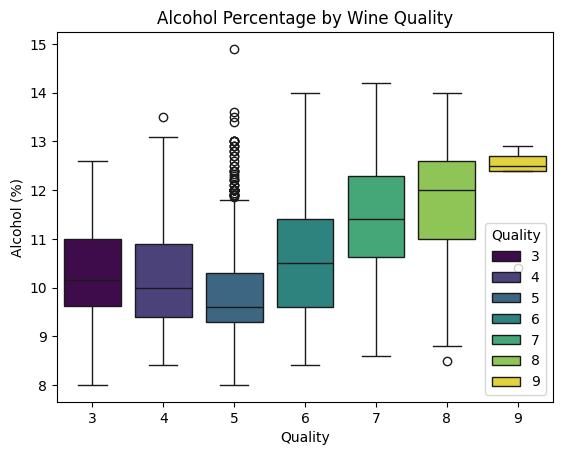

In [104]:
sns.boxplot(x="quality", y="alcohol", data=wine_quality, hue="quality", palette="viridis")
plt.title("Alcohol Percentage by Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Alcohol (%)")
plt.legend(title="Quality")
plt.show()

## 1.4 Percentage of wine type in the quality group

To show the percentage of wine type within each quality group, 100% stacked bar plot is a good choice. It allows to quickly compare the percentage of each wine type within each quality group and depict all groups in one plot. However, data must be preprocessed to calculate the percentage first.

Alternatively, pie charts can be used, but they are harder to compare and are not recommended for more than 2-3 groups. 

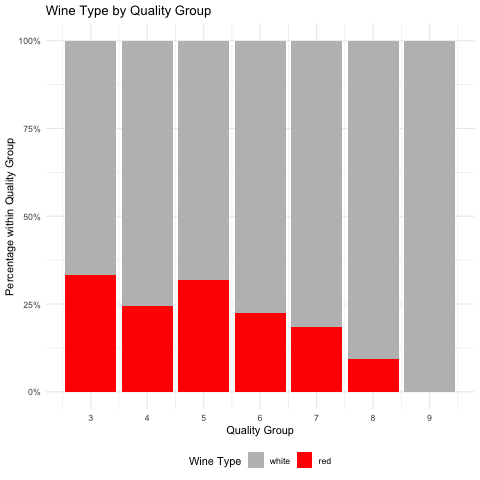

In [105]:
%%R
percentage <- wine_quality %>%
  count(quality, wine_type) %>%
  group_by(quality) %>%
  mutate(freq = n / sum(n)) %>%
  ungroup()

percentage$wine_type <- factor(percentage$wine_type, levels = c("white", "red"))

ggplot(percentage, aes(x = quality, y = freq, fill = wine_type)) +
  geom_bar(stat = "identity", position = "fill") +
  scale_fill_manual(values = c("white" = "grey", "red" = "red")) +
  scale_x_continuous(breaks = 3:9, labels = 3:9) +
  scale_y_continuous(labels = percent) +
  labs(title = "Wine Type by Quality Group",
       x = "Quality Group",
       y = "Percentage within Quality Group",
       fill = "Wine Type") +
  theme_minimal() +
  theme(legend.position = "bottom")

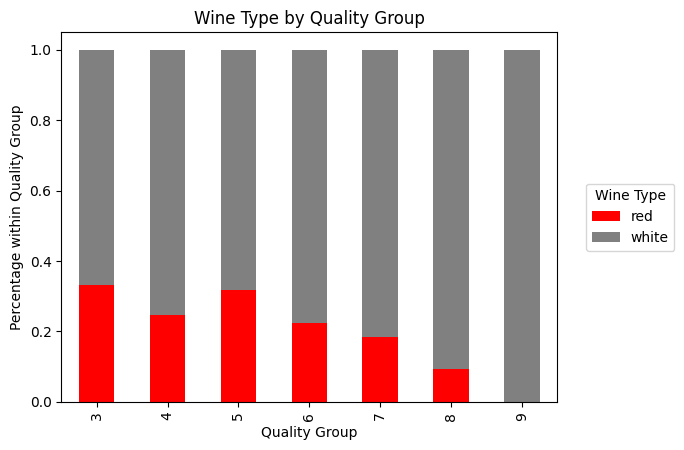

In [106]:
# Plot the percentage of red and white wine within each quality score
wine_type_counts = wine_quality.groupby(["quality", "wine_type"]).size().unstack(fill_value=0)
percentage = wine_type_counts.divide(wine_type_counts.sum(axis=1), axis=0)

percentage.plot(kind="bar", stacked=True, color=palette.values())
plt.title("Wine Type by Quality Group")
plt.xlabel("Quality Group")
plt.ylabel("Percentage within Quality Group")
plt.legend(title="Wine Type", loc="center right", bbox_to_anchor=(1.25, 0.5))
plt.show()

## 1.5 Relationship between acidity variables (fixed vs volatile)

For the relationship between two numerical variables, scatter plot is a good choice. It allows to quickly see the relationship between two variables and potential outliers. To introduce more data, joint plot is used. It is a scatter plot with histograms for each variable.

Other possible option is to use a pair plot, but it is harder to read and interpret.

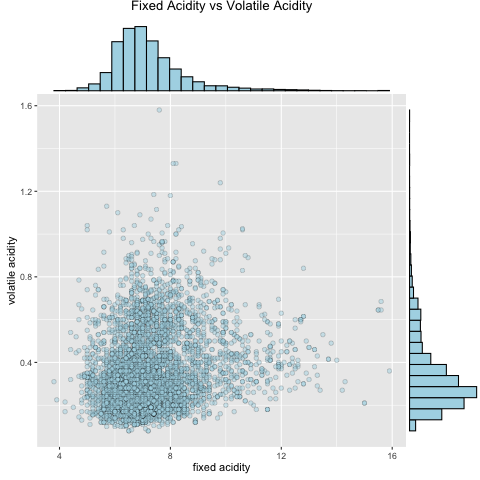

In [107]:
%%R
p <- ggplot(wine_quality, aes(x = `fixed acidity`, y = `volatile acidity`)) +
  geom_point(alpha = 0.5, size = 2, color = "black", stroke = 0.2, fill = "lightblue", shape = 21) +
  ggtitle('Fixed Acidity vs Volatile Acidity') +
  theme(plot.title = element_text(hjust = 0.5))

# Add marginal histograms
ggExtra::ggMarginal(p, type = 'histogram', fill = "lightblue")

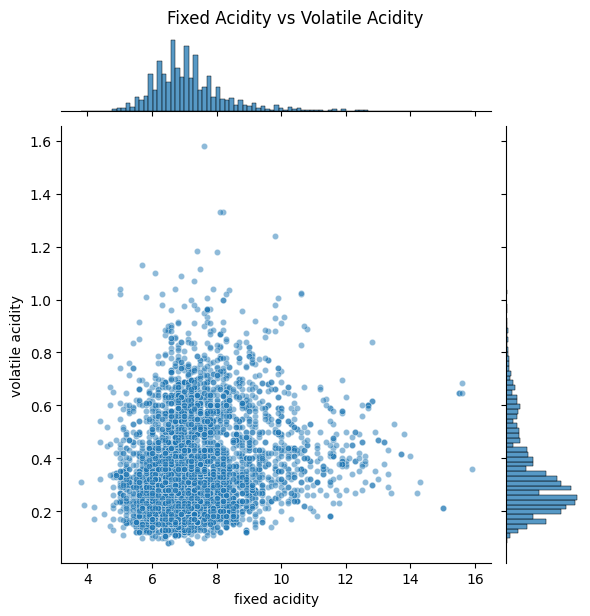

In [108]:
sns.jointplot(x='fixed acidity', y='volatile acidity', data=wine_quality, kind='scatter', alpha=0.5, s=20)
plt.suptitle('Fixed Acidity vs Volatile Acidity', y=1.02)
plt.show()